# Maven Reward Challenge
I’ll play the role of a Sr. Marketing Analyst at Maven Cafe.

Over a 30-day period, Maven Cafe tested different types of offers with Rewards members.

Now that the 30-day period for the test has concluded, my task is to identify key customer segments and develop a data-driven strategy for future promotional messaging & targeting.

Data that simulates the behavior of Cafe Rewards members over a 30-day period, including their transactions and responses to promotional offers.

The data is contained in three files: one with details on each offer, another with demographic information on each customer, and a third with the activity for each customer during the period.

The activities are divided into offer received, offer viewed, offer completed, and transaction.

For a transaction to be attributed to an offer, it must occur at the same time as when the offer was "completed" by the customer.

I have already cleaned the raw datasets. Cleaned offer, cleaned event, and cleaned_customer. There were some errors, I will clean them here. 

## Objectives: 

The goal of this project was to answer three main questions:

** Which customers respond best to offers?
** What types of offers work best?
** How should we reach them to maximize impact?

Insights from this test will guide future promotional campaigns to bring in more revenue and improve customer loyalty.


## Part 1: Setup and Data Loading

### 1.1: Import Libraries
Import all packages. Group them by function to keep the setup clean and explain their purpose.

In [1]:
# Core libraries for data manipulation and numerical operations
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
# Set a consistent visual style for all plots
sns.set_style('whitegrid')
# Suppress routine warnings (e.g., from library versions) to keep output clean
import warnings
warnings.filterwarnings('ignore')

#import a script for data cleaning
from initial_report import initial_report

### 1.2: Load Data
Load the three CSV files for immediate inspection.
You will rename them as df_customer, df_event, df_offer

In [2]:
# Load DataFrames


### 1.3: Data Overview Function

I already created a data overview function (initial_report) to make the process easier for data cleaning.

Now run the initial_report function for all three data set


In [4]:
# --- Inspect Customer Data ---


Expected Results for Event data: 

** Total Rows: 14825
** Total Columns: 5
** became_member_on: object
** Distinct Values per Column:
  customer_id: 14825
  became_member_on: 1707
  gender: 3
  age: 84
  income: 91
** Duplicates: 0

In [5]:
# --- Inspect Event Data ---


Expected Results for customer data: 

** Total Rows: 306137
** Total Columns: 6
*** Mixed Data Types:
  offer_id:
    - str: 167184
    - float: 138953
*** Distinct Values per Column:
  customer_id: 17000
  event: 4
  time: 120
  offer_id: 10
  amount: 5103
  reward: 4
*** Outliers (IQR method):
  time: No outliers
    Lower Bound: -327.00
    Upper Bound: 1041.00
  amount: 1236 outliers
    Lower Bound: -20.16
    Upper Bound: 41.01
  reward: 6936 outliers
    Lower Bound: -2.50
    Upper Bound: 9.50

In [1]:
# --- Inspect Offer Data ---


Expected Results for customer data: 

** Total Rows: 10
** Total Columns: 6
*** Distinct Values per Column:
  offer_id: 10
  offer_type: 3
  difficulty: 5
  reward: 5
  duration: 5
  channels: 4
*** Outliers (IQR method):
  difficulty: 1 outliers
    Lower Bound: -2.50
    Upper Bound: 17.50
  reward: 2 outliers
    Lower Bound: -2.50
    Upper Bound: 9.50
  duration: No outliers
    Lower Bound: 2.00
    Upper Bound: 10.00


### 1.4: Initial Findings & Cleaning Plan

Based on the overview:

1.  **`df_customer`**:
    * `became_member_on`: Is an `object` (string). It **must** be converted to `datetime` to analyze membership tenure.
    * `gender`: Contains 3 values ('M', 'F', 'O').
    * `age` & `income`: Are numerical with no missing values. I will bin these later to analyze cohorts. 

2.  **`df_event`**:
    * `event`: Has 4 unique values as expected ('offer received', 'offer viewed', 'offer completed', 'transaction').
    * `offer_id`, `amount`, `reward`: Have significant missing values. This is **expected** and not an error.
        * `offer_id` is null only for 'transaction' events.
        * `amount` is null only for 'offer' events.
        * `reward` is null for all except 'offer completed' events.
    * This structure confirms a central challenge: `offer_id` and `amount` are in separate rows.

3.  **`df_offer`**:
    * `duration`: This is in **days**. The `df_event['time']` column is in **hours**. These units are incompatible. **Need** to standardize them. **Need** to convert `duration` to hours.
    * `channels`: Is an `object` (a string that looks like a list). This is unusable for analysis and must be cleaned for channel effectiveness.

**Conclusion:** The data is structurally sound, but the `duration`/`time` unit mismatch is a critical flaw that must be fixed. The `became_member_on` conversion is also mandatory.

## Part 2: Data Cleaning

### 2.1: Preprocess `df_offer`

Two tasks:
1.  **Fix Units:** Convert `duration` from days to hours to match the `time` column in `df_event`.
2.  **Create `offer_key`:** The `offer_id` hash is useless for interpretation. I'll create a readable key (e.g., `bogo-10-10-7`) that summarizes the offer's properties.

In [6]:
# Create a copy to ensure our original loaded data remains untouched


# 1. Convert duration from days to hours
# This is a critical step for logical comparisons with the 'time' column


# 2. Create a human-readable offer_key for easier analysis and plotting
# This combines the core attributes of each offer into a simple string


print("Cleaned Offer Data:")
# Display the original columns and the new, corrected/created ones


Cleaned Offer Data:


You will get a dataframe with column offer_id, offer_key, duration, duration_hours

verify with this offer id:

ae264e3637204a6fb9bb56bc8210ddfd, bogo-10-10-7, 7, 168

### 2.2: Preprocess `df_customer`

Here, I'll convert the membership date and create the demographic cohorts.

1.  **Convert `became_member_on`**: Change from string to a `datetime` object.
2.  **Create Bins**:
    * `membership_year`: Extract the year to analyze tenure.
    * `age_group`: Bin ages into standard cohorts.
    * `income_group`: Bin incomes into 'Low', 'Middle', and 'High'.

In [8]:
# Create a copy for processing


# 1. Convert membership date to datetime


# 2. Extract membership year


# 3. Create age_group bins
# Using 17 as the lower bound since 18 is the min age


# 4. Create income_group bins


In [9]:
print("Cleaned Customer Data with New Features:")


Cleaned Customer Data with New Features:


You will get a datafram with customer_id, age, age_group, income, income_group, membership_year

verify with the following:

0610b486422d4921ae7d2bf64640c50b, 55, Older Adult, 112000.0, High Income, 2017

In [10]:
print("\nAge Group Distribution:")



Age Group Distribution:


Expected Result:
age_group
Young Adult         2256
Middle Age Adult    3153
Older Adult         5150
Senior              3164
Elderly             1102

In [11]:
print("\nIncome Group Distribution:")



Income Group Distribution:


Expected Result:
income_group
Low Income       2869
Middle Income    8941
High Income      3015
Name: count, dtype: int64

In [12]:
# create a histplot to see Age Distribution: To see the shape of the customer base


**Expected**
Peak Age Range: Around 55-60 years old
KDE Curve: Shows the peak is around age 55-58
Core demographic is older adults-senior (50-65)
Marketing strategies should likely target this age group
Consider products/services that appeal to this demographic
Younger customer acquisition (under 40) might be an opportunity for growth

In [13]:
# Create a hisplot to get Income Distribution:


**Expected**
The majority of customers are middle-income earners ($50k–$80k).
The customer income distribution is moderately right-skewed, indicating fewer high-income customers.
Targeting promotions or offers toward the middle-income group could yield the highest engagement

In [2]:
#Age Group Counts: To show the size of your cohorts.


You will get bar chart where older adult age group is higher

In [3]:
#Income Group Counts


You will get bar chart with middle income group high

In [4]:
#create a heatmap to show where the "heart" of our customer base is.
# use pd.crosstab() to create a 2D matrix of customer counts.



**Comment**
Hottest Spots (Largest Customer Segments): Older Adult + Middle Income = 2,979 customers

### 2.3: Preprocess `df_event` & Merge

The `df_event` data is clean, but it's the link between customers and offers. Next step is to create one master DataFrame that contains all information for every event.

Informational offers do **not** have an 'offer completed' event. A customer "completes" one by viewing it and then making any transaction within its duration.

In [6]:
# Create a copy for preprocessing


### Merge all 3 cleaned dataframes into one master table
 This brings customer demographics and offer details into one timeline.

In [8]:
#check events_clened before final merge


You will get shape (306137, 6)

In [9]:
#check customer_cleaned before final merge


The shape will be (14825,8)

In [10]:
###  Merging Master Data
# I will use the 'events_cleaned' as the LEFT table.
# This ensures we keep all 306,137 events.
# Events from customers not in 'customers_cleaned' will have NaN


# Now, must check for the orphan events

**Expected:**

Total Rows in event log: 306137
total rows after merge: 306137
Orphan rows: 33749

In [11]:
### Dropping Orphan Data
# I cannot analyze events if we don't know the customer's demographics.
# Therefore,it will best to drop these 33,749 rows.




**Expected:**

Dropped 33749 orphan event rows.
New master DataFrame shape: (272388, 13)

In [12]:
# Now, need to merge the offer data.
# I use 'left' because transaction events won't have an offer_id.


Validate with the following customer
customer_id: 78afa995795e4d85b5d9ceeca43f5fef, offer received, time:0, offer_id: 9b98b8c7a33c4b65b9aebfe6a799e6d9, 2017-05-09, age: 75.0, income: 100000

In [13]:
# Sort chronologically for each customer. This is crucial for the iteration logic.


Final, cleaned master DataFrame shape: (272388, 20)

In [14]:
##check total number of duplicated rows


Duplicate: 0

In [15]:
#check amount of different offers


event
transaction        123957
offer received      66501
offer viewed        49860
offer completed     32070
Name: count, dtype: int64

In [16]:
# lets check data for some customers "0009655768c64bdeb2e877511632db8f" understand the data 


verify:
0009655768c64bdeb2e877511632db8f, transaction, 	696	, 2017-04-21, 72000.0	

### What I got?
1. `transaction` may happen without `offer_completed`.We can not attribute them as offer_related_transaction as the rule is **For a transaction to be attributed to an offer, it must occur at the same time as when the offer was "completed" by the customer**.
2. In some cases offers are received, viewed but not completed.
3. In some cases offers are received, completed but not viewed.I will also not include this as offer related transaction.Because it could be a coincidence, not a offer prompted transaction.
4. A customer recevied multiple offers without viewing the previous offer.
5. A customer complete two offers with one transaction. I need to check, how one transaction will assoicate with two offers.

So, a transaction will be attributed to offer if it follows the hierarchy. offer_received --> offer_viewed --> offer_completed & Transaction happened together. Otherwise, the events will not be in the final dataset. This will define **truly influenced purchase**.


## Part 3: Building the Offer Attribution Funnel

This is the most critical step. The dataset does not explicitly link transactions to offers, so we must build this link logically.

**My Logic for a "Successful Offer":**
A successful, attributed offer must follow this exact sequence:
1.  **Offer Received:** The `offer received` event starts the clock.
2.  **Offer Viewed:** The customer must view the offer *after* receiving it and *before* it expires.
3.  **Offer Completed:** The customer must complete the offer *after* viewing it and *before* it expires.
4.  **Transaction Match:** A `transaction` event must exist at the *exact same time* as the `offer completed` event.

### 3.1: Building the Attribution Function

This function will process the event history for a *single customer* and return a list of all their successful offer journeys.

**Note on Informational Offers:**
Informational offers have no 'offer completed' event. Their goal is just to drive a transaction. For now, I will focus **only on BOGO and Discount offers** (which have 'offer completed' events). I will explicitly skip informational offers for now.

In [17]:
### 3.1: Building the attribution function
    

### 3.2: Applying the Function and Creating the Final DataFrame

Now i will apply this function to every customer. We use `.groupby('customer_id')` and `.apply()` to run our function on each customer's event-block. This will take a moment.

Processing customer events... This may take a minute.
Process complete.
Created final DataFrame with 22533 successfully attributed BOGO/Discount completions.

### 3.3. Check and verify the data whether sequence are okay or not

In [18]:
#Check is there any row where rcv_time<view_time is not followed


In [19]:
#Check is there any row where view_time<completed_time is not followed


In [20]:
#check some data for previous customers e2127556f4f64592b11af22de27a7932

For this customer one `transaction` happened for two `offer_completion` that I saw previously. However, here one transaction got linked to two rows. It means that as `transaction` didn't have any offer_id, it will create problems to link transaction with an specific offer, which evantually will not help to get actual revenue. 
I will keep this data's as they show me the potential of this offer.

### 3.4: Inspect the Final Analysis-Ready Data

Finally, i got 22533 offer related rows. I will move further with this data.
Let's do a quick check on our new, clean DataFrame.

In [21]:
# Check for any duplicates. This should be 0.

# Check for nulls. This should be 0.

# Look at the descriptive data

**Comment:**
Average offer_related_transaction amount is $20.46. 
And, average reward amount is $4.95. 

## Part 4: Analysis

With this clean `df_final` DataFrame, I can now confidently analyze offer effectiveness and customer behavior.

This analysis will answer four key questions:
1.  **Financial Impact:** What is the real financial impact of these offers?
2.  **Offer Performance:** Which specific offers are the most effective at driving completions?
3.  **Customer Performance:** Which demographic segments (age, income, gender) are most responsive to offers?

### 4.1: Financial Impact Analysis

### 4.1.1.: 
I will calculate the total revenue generated *directly* from our attributed offers and compare it to the total cost (rewards paid out). This gives us a clear reward-to-sales ratio.

--- Offer Financials (BOGO/Discount) ---

Total Attributed Revenue: $461,130.75

Total Rewards Paid:       $111,879.00

Reward-to-Sales Ratio:    24.26%

This means for every $1.00 

in sales generated by an offer, 

we spent $0.24 on the reward.

#### 4.1.2.:
I want to compare the total revenue with or without offer. 
From df_transaction, I will get total transaction amount.
After that i can have the ratio between offer_related_reveue and total revenue

The number of total transaction is 123957

Total Revenue is $1734942.40

Average revenue with or without offer is: $14.00

26.58 percent of total revenue is offer related

### 4.1.3:
Which one is successfull? with or without offer?
I can have this idea by calculating mean transaction amount.
For this case, I need to seperate offer related transaction and non-offer related transaction

**Comment**
Here I got 21642 offer related transaction, instead of 22533. It is because one transaction got attached to multiple offer_completion in some cases.

Total offer related transaction is (21642, 18)

Total non offer transaction is (102315, 18)

Average Offer-Driven Transaction: $20.19

Average Non-Offer Transaction:    $12.69

Insight: Offer-driven purchases are, on average, 59.2% more valuable.

In [22]:
# Create a simple DataFrame for plotting offer_driven and non_offer driven average spend


### 4.2: Offer Performance (Conversion Rate)

I need to know how the offer performs. How many percentage of received offers are actually viewed. And How many viewed offers are actually completed.
This will also help me to check the funnel leakage.

### 4.2.1.: In order to this. I must get df_received based on customers who receive bogo and discount offers. 

In [23]:
# get df_offer_received without including the informational offers


df_offer_received: 53201

### 4.2.2.: now we need to get offer viewed counts by iterating the received events
i will create a function to get offer viewed events
As one customer may view multiple received offers, this function will help to get actual viewed events from received events. that will follow following condition viewed_events<=received_events+duration
I will count the first viewed events for a specific received offer

Processing viewed_events... (This may take a minute)
Offer Based Viewed Events Found: 40524
verify:
0011e0d4e6b944f998e987f904e8c1e5, bogo-5-5-7, 504	516	NaN	NaN, 40.0	57000.0	2018.0

### 4.2.3.: Calculate the converstion rate from R to V to C
I already got df_offer_received, df_offer_viewed, form df_final i can get total offer completion

You will find a table with column name: Stage	Count	Conversion (from Received)	Conversion (from Previous Step)

0	1. Received	53201	100.0%	100.00%

1	2. Viewed	40524	76.17%	76.17%

2	3. Completed	22533	42.35%	55.60%


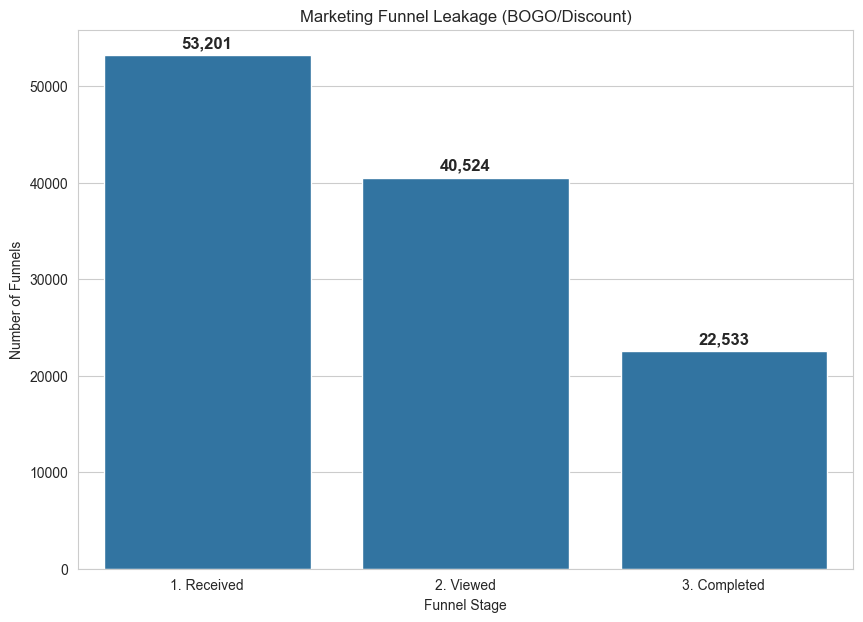

In [42]:
# --- Visualize the Funnel with annotations ---


**Comment:**

53,201 offers were sent out.

Only 40,524 were ever viewed.

This means 23.83% of our offers (100% - 76.17%) failed because the customer never even saw them.

again,

40,524 customers saw an offer.

Only 22,533 of them acted on it.

This means (100% - 55.60%)= 44.40% of aware customers looked at the deal and did not pay any interest.

This data strongly supports my finding from Cell 41: push to get customers onto all four channels (['web', 'email', 'mobile', 'social']) to maximize the chance they actually see the offer sent.

### 4.2.3.: Calculate the offer type performance

--- Offer performance ---
                  received  Viewed  Completed R_to_V_Rate (%) V_to_C_Rate (%) R_to_C_Rate (%)
offer_key                                                                                    
discount-10-2-10      6652    6433       4329          96.71%          67.29%          65.08%
discount-7-3-7        6655    6390       4119          96.02%          64.46%          61.89%
bogo-5-5-5            6576    6279       3374          95.48%          53.73%          51.31%
bogo-10-10-5          6593    6282       2731          95.28%          43.47%          41.42%
bogo-10-10-7          6683    5901       2585          88.30%          43.81%          38.68%
discount-10-2-7       6631    3457       2047          52.13%          59.21%          30.87%
bogo-5-5-7            6685    3507       2037          52.46%          58.08%          30.47%
discount-20-5-10      6726    2275       1311          33.82%          57.63%          19.49%

**Comment**

This table separates an offer's Discovery (R->V) from its Persuasion (V->C).

discount-20-5-10 (33.82%) is a total failure in terms of channels. Two-thirds of the people never even saw it.

The bogo-10-10... offers are terrible. Even when people saw them, 56-57% of them did not respond." The $10 difficulty is too high for a BOGO.

The Perfect Offer: discount-10-2-10 and discount-7-3-7 are your superstars. They were sent on good channels (high R->V) and had a persuasive message (high V->C).

discount-10-2-7 had a great persuasion rate (59.21%), but it was may be put on terrible channels (52.13% R->V), so it failed. This wasn't a bad offer; may be it was a marketing-channel failure.

In [24]:
# Now plot R_to_c Rate


### 4.3: Channel Performance (Conversion Rate)
Now I will check channel performance to validate the offer performance results. Where are the problems? whether it is in channels or offer?

--- Channel Conversion Rates ---
Received	viewed	completions	R to V Rate	V to C Rate	R to C Rate
channels						
['web', 'email', 'mobile', 'social']	26476	25384	14553	95.88%	57.33%	54.97%
['email', 'mobile', 'social']	6683	5901	2585	88.3%	43.81%	38.68%
['web', 'email', 'mobile']	13316	6964	4084	52.3%	58.64%	30.67%
['web', 'email']	6726	2275	1311	33.82%	57.63%	19.49%


**Comment**
This data proves that 'mobile' and 'social' are the two most critical channels for marketing visibility.The primary marketing goal should be to migrate all customers onto all four channels

### 4.4: Demographic Performance



### 4.4.1.: Who are our best customers?

In [26]:
#1. --- Analyze by Age Group ---also create a bar chart


**Comment:** Senior, Older Adult, and Elderly customers are the premium segment. They spend an average of $22 per successful offer. They are high-value and reliable.

--- Analysis by Age Group (Offer Completions) ---
                  count          sum    mean
age_group                                   
Senior             4947  $111,882.33  $22.62
Older Adult        8258  $185,998.16  $22.52
Elderly            1808   $39,608.99  $21.91
Middle Age Adult   4918   $88,471.96  $17.99
Young Adult        2602   $35,169.31  $13.52

In [27]:
#2. --- Analyze by Income Group ---with a bar chart


**Comment**
High income group tend to spend more per transaction.

--- Analysis by Income Group (Offer Completions) ---
               count          sum    mean
income_group                             
High Income     5455  $162,555.71  $29.80
Middle Income  14030  $261,636.93  $18.65
Low Income      3048   $36,938.11  $12.12

In [28]:
#3. --- Analyze by Gender ---


**Comment**
Female spend more per transaction compared to men.




--- Analysis by Gender (Offer Completions) ---
        count          sum    mean
gender                            
F       10500  $235,064.10  $22.39
O         389    $7,536.91  $19.38
M       11644  $218,529.74  $18.77

### 4.4.2.: What offer they respond?

Create a hitmap, x=age_group, y=offer_type (bogo, discount) 

**Comment**:

Discount offers are significantly more persuasive than BOGO offers across all age groups.